<a href="https://colab.research.google.com/github/Fehmi-Karaal/9dof-orientation-estimation/blob/master/Israel_Palestine_War_Sentiment_Analysis_October.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import pandas as pd
from google.colab import drive


import pandas as pd
from textblob import TextBlob
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
df = pd.read_csv('/content/drive/MyDrive/A4P/combined_October_updated.csv')

In [41]:
df.head()

Date  \
0  2023-10-31 22:12:06+00:00   
1  2023-10-31 22:09:45+00:00   
2  2023-10-31 20:33:03+00:00   
3  2023-10-31 20:32:17+00:00   
4  2023-10-31 20:32:17+00:00   

                                               Tweet   edit_history_tweet_ids  \
0  Great to meet with Senator Deacon today to dis...  ['1719477372993323086']   
1  J'ai été ravie de rencontrer le sénateur Deaco...  ['1719476782212989012']   
2  Happy to announce a tentative agreement with t...  ['1719452447259640188']   
3  Les deux parties sont arrivées à la table en s...  ['1719452253981962730']   
4  Heureuse d'annoncer un accord de principe avec...  ['1719452251943555520']   

     author_id         Name  
0  480418245.0  Anita Anand  
1  480418245.0  Anita Anand  
2  480418245.0  Anita Anand  
3  480418245.0  Anita Anand  
4  480418245.0  Anita Anand

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [43]:
!pip install nltk
import nltk
nltk.download('wordnet')
zip_file_path = '/usr/share/nltk_data/corpora/wordnet.zip'
destination_directory = '/usr/share/nltk_data/corpora/'



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    # Remove special characters and lowercase the text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization and removing stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Join the tokens back into a sentence
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Example usage on 'self_text' column of your DataFrame
df['clean_text'] = df['Tweet'].apply(clean_text)

<ipython-input-46-5105040aaedc>:10: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [47]:
for i in range(10):
    print(df.clean_text[i])

great meet senator deacon today discus regulatory modernization red tape reduction look forward continuing work together support canadian smallbiz entrepreneur looking forward working senator
jai ravie de rencontrer le snateur deacon aujourdhui pour discuter de la modernisation de la rglementation et de la rduction de formalits administratives je rjouis de continuer travailler ensemble pour soutenir le pmes et le entrepreneur canadiens
happy announce tentative agreement gc pipscipfpc group party came table focused key priority resulting agreement fair employee reasonable taxpayer
le deux party sont arrives la table en se concentrant sur le priorits essentielles ce qui abouti un accord quitable pour le employ et raisonnable pour le contribuables
heureuse dannoncer un accord de principe avec le gc et pipscipfpc pour pour le groupe technology de linformation
bilingualism make public service diverse reflective community serf support ol modernization act continue support officiallanguage mi

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    4012 non-null   object 
 1   Tweet                   4012 non-null   object 
 2   edit_history_tweet_ids  4012 non-null   object 
 3   author_id               4012 non-null   float64
 4   Name                    4012 non-null   object 
 5   clean_text              4012 non-null   object 
dtypes: float64(1), object(5)
memory usage: 188.2+ KB


In [49]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Declare variables for scores
scores = {
    "Compound": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

# Generate sentiment scores for Reddit comments
for comment in df['clean_text']:
    compound = analyzer.polarity_scores(comment)["compound"]
    pos = analyzer.polarity_scores(comment)["pos"]
    neu = analyzer.polarity_scores(comment)["neu"]
    neg = analyzer.polarity_scores(comment)["neg"]

    scores["Compound"].append(compound)
    scores["Positive"].append(pos)
    scores["Negative"].append(neg)
    scores["Neutral"].append(neu)

# Create a new DataFrame for sentiment scores
sentiments_score = pd.DataFrame(scores)

# Join the sentiment scores DataFrame with the original DataFrame
df = pd.concat([df, sentiments_score], axis=1)

In [51]:
df.head()


Date  \
0  2023-10-31 22:12:06+00:00   
1  2023-10-31 22:09:45+00:00   
2  2023-10-31 20:33:03+00:00   
3  2023-10-31 20:32:17+00:00   
4  2023-10-31 20:32:17+00:00   

                                               Tweet   edit_history_tweet_ids  \
0  Great to meet with Senator Deacon today to dis...  ['1719477372993323086']   
1  J'ai été ravie de rencontrer le sénateur Deaco...  ['1719476782212989012']   
2  Happy to announce a tentative agreement with t...  ['1719452447259640188']   
3  Les deux parties sont arrivées à la table en s...  ['1719452253981962730']   
4  Heureuse d'annoncer un accord de principe avec...  ['1719452251943555520']   

     author_id         Name  \
0  480418245.0  Anita Anand   
1  480418245.0  Anita Anand   
2  480418245.0  Anita Anand   
3  480418245.0  Anita Anand   
4  480418245.0  Anita Anand   

                                          clean_text  Compound  Positive  \
0  great meet senator deacon today discus regulat...    0.7783     0.236   
1  jai ravie de rencontrer le snateur deacon aujo...    0.0000     0.000   
2  happy announce tentative agreement gc pipscipf...    0.9493     0.577   
3  le deux party sont arrives la table en se conc...    0.4019     0.091   
4  heureuse dannoncer un accord de principe avec ...    0.0000     0.000   

   Negative  Neutral  
0       0.0    0.764  
1       0.0    1.000  
2       0.0    0.423  
3       0.0    0.909  
4       0.0    1.000

In [52]:
# Define conditions for sentiment categories based on 'Compound' scores
# If Compound score is <= -0.5, classify as 'Negative'
# If Compound score is > -0.5 and < 0.5, classify as 'Neutral'
# If Compound score is >= 0.5, classify as 'Positive'
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' using np.select to assign values based on the conditions
df['Category'] = np.select(conditions, values)

In [53]:
df.head()

Date  \
0  2023-10-31 22:12:06+00:00   
1  2023-10-31 22:09:45+00:00   
2  2023-10-31 20:33:03+00:00   
3  2023-10-31 20:32:17+00:00   
4  2023-10-31 20:32:17+00:00   

                                               Tweet   edit_history_tweet_ids  \
0  Great to meet with Senator Deacon today to dis...  ['1719477372993323086']   
1  J'ai été ravie de rencontrer le sénateur Deaco...  ['1719476782212989012']   
2  Happy to announce a tentative agreement with t...  ['1719452447259640188']   
3  Les deux parties sont arrivées à la table en s...  ['1719452253981962730']   
4  Heureuse d'annoncer un accord de principe avec...  ['1719452251943555520']   

     author_id         Name  \
0  480418245.0  Anita Anand   
1  480418245.0  Anita Anand   
2  480418245.0  Anita Anand   
3  480418245.0  Anita Anand   
4  480418245.0  Anita Anand   

                                          clean_text  Compound  Positive  \
0  great meet senator deacon today discus regulat...    0.7783     0.236   
1  jai ravie de rencontrer le snateur deacon aujo...    0.0000     0.000   
2  happy announce tentative agreement gc pipscipf...    0.9493     0.577   
3  le deux party sont arrives la table en se conc...    0.4019     0.091   
4  heureuse dannoncer un accord de principe avec ...    0.0000     0.000   

   Negative  Neutral  Category  
0       0.0    0.764  Positive  
1       0.0    1.000   Neutral  
2       0.0    0.423  Positive  
3       0.0    0.909   Neutral  
4       0.0    1.000   Neutral

In [54]:
df[df['Category']=='Negative']

Date  \
10    2023-10-30 17:01:26+00:00   
41    2023-10-21 16:12:22+00:00   
58    2023-10-18 14:07:58+00:00   
61    2023-10-17 16:42:16+00:00   
102   2023-10-25 11:33:26+00:00   
...                         ...   
3963  2023-10-12 16:27:13+00:00   
3990  2023-10-10 14:21:22+00:00   
4003  2023-10-07 23:26:21+00:00   
4004  2023-10-07 22:06:20+00:00   
4005  2023-10-07 14:28:04+00:00   

                                                  Tweet  \
10    ⚠️As of today, WeChat and Kaspersky apps will ...   
41    RT @KamalKheraLib: This is completely unaccept...   
58    J'ai été ravie de rencontrer la directrice gén...   
61    With Canada's First Poverty Reduction Strategy...   
102   My interview on CBC Radio yesterday on the sit...   
...                                                 ...   
3963  RT @melaniejoly: In the wake of the terrorist ...   
3990  RT @CanadianPM: When it comes to mental health...   
4003  I stand in solidarity &amp; unequivocally supp...   
4004  RT @melaniejoly: Canadians in or around an are...   
4005  RT @ZelenskyyUa: Horrible news from Israel. My...   

       edit_history_tweet_ids     author_id                   Name  \
10    ['1719036803456319667']  4.804182e+08            Anita Anand   
41    ['1715762962403643620']  4.804182e+08            Anita Anand   
58    ['1714644493905875073']  4.804182e+08            Anita Anand   
61    ['1714320936256585969']  4.804182e+08            Anita Anand   
102   ['1717142318694748298']  2.327530e+09           Chandra Arya   
...                       ...           ...                    ...   
3963  ['1712505209799262467']  1.140090e+18  MP Ryan Turnbull 🇨🇦🇺🇦   
3990  ['1711748765038612562']  1.140090e+18  MP Ryan Turnbull 🇨🇦🇺🇦   
4003  ['1710798748224266638']  1.140090e+18  MP Ryan Turnbull 🇨🇦🇺🇦   
4004  ['1710778611286921283']  1.140090e+18  MP Ryan Turnbull 🇨🇦🇺🇦   
4005  ['1710663283433144586']  1.140090e+18  MP Ryan Turnbull 🇨🇦🇺🇦   

                                             clean_text  Compound  Positive  \
10    today wechat kaspersky apps removed government...   -0.6705     0.000   
41    rt kamalkheralib completely unacceptable perso...   -0.5095     0.000   
58    jai ravie de rencontrer la directrice gnrale d...   -0.5719     0.000   
61    canada first poverty reduction strategy made i...   -0.5574     0.207   
102   interview cbc radio yesterday situation gaza h...   -0.9201     0.131   
...                                                 ...       ...       ...   
3963  rt melaniejoly wake terrorist attack israel ca...   -0.8316     0.000   
3990  rt canadianpm come mental health one fight bat...   -0.7351     0.000   
4003  stand solidarity unequivocally support people ...   -0.8885     0.128   
4004  rt melaniejoly canadian around area affected a...   -0.5719     0.000   
4005  rt zelenskyyua horrible news israel condolence...   -0.9274     0.000   

      Negative  Neutral  Category  
10       0.224    0.776  Negative  
41       0.215    0.785  Negative  
58       0.135    0.865  Negative  
61       0.281    0.511  Negative  
102      0.433    0.436  Negative  
...        ...      ...       ...  
3963     0.415    0.585  Negative  
3990     0.474    0.526  Negative  
4003     0.376    0.496  Negative  
4004     0.281    0.719  Negative  
4005     0.576    0.424  Negative  

[738 rows x 11 columns]

In [55]:
# Group the DataFrame by 'Category' and count the occurrences of each category
category_counts = df.groupby(['Category'])['Category'].count()

# Create a DataFrame with counts and rename the column to 'Counts'
counts_df = pd.DataFrame(category_counts).rename(columns={"Category": "Counts"})

# Calculate the percentage for each category and add it as a new column 'Percentage'
counts_df['Percentage'] = (counts_df['Counts'] / counts_df['Counts'].sum()) * 100

# counts_df = counts_df.drop(index=0)

# Print or return the summary DataFrame
print(counts_df)

          Counts  Percentage
Category                    
Negative     738   18.394816
Neutral     2208   55.034895
Positive    1066   26.570289


In [56]:
counts_df


Counts  Percentage
Category                    
Negative     738   18.394816
Neutral     2208   55.034895
Positive    1066   26.570289

In [57]:
import plotly.express as px

# Create a Pie Chart using Plotly
fig = px.pie(counts_df, values='Counts', names=counts_df.index,
             labels={'Category': 'Sentiment Category', 'Counts': 'Count'},
             title='Distribution of Sentiment Categories in Comments',
             hole=0.3,
             color_discrete_sequence=px.colors.qualitative.Set1)

# Set the background color of the Pie Chart to dark grey
fig.update_layout(paper_bgcolor='darkgrey')


# Show the Plotly Pie Chart
fig.show()

In [58]:
# Select the top 50 comments with the highest 'Compound' scores from the DataFrame
top_50_pos_comments = df.nlargest(n=50, columns=['Compound'])["clean_text"]

# This line selects the top 50 comments based on their 'Compound' scores,
# indicating the 50 comments with the most positive sentiment.


print(top_50_pos_comments)

# print top 5
# for com in top_50_pos_comments:
#     print(com, "\n")

825     today across country canadian gathering family...
1596    congratulation 2023 aurora chamber commerce bu...
92      special congratulation honourable olena zelens...
3044    happy thanksgiving celebrating oakville across...
1268    wishing happy navratri hindu community celebra...
3841    thanksgiving especially grateful family consti...
1409    congratulation afrogtv 20th excellenceawards p...
1607    navratri start october 15th vibrant joyful hin...
2631    appreciated opportunity speak attendee true no...
3746    wishing hindu canada around world happy navrat...
1052    made 14th blood donation tonight inspire one p...
1266    diwali signifies triumph light darkness good e...
1045    happy islamic heritage month canada wonderful ...
3855    yesterday thrilled attend mellys market caf br...
71      true honour celebrate 75 year brontercl486 sup...
1981    pleased bring greeting business excellence awa...
800     yesterday fccms midautumn festival celebration...
21      congra

In [59]:
# Select the top 50 comments with the highest 'Compound' scores from the DataFrame
top_50_neg_comments = df.nsmallest(n=50, columns=['Compound'])["clean_text"]

print(top_50_neg_comments)

## print top 5
# for com in top_50_neg_comments:
#     print(com, "\n")

879     heart ache civilian brutalized murdered israel...
3813    place glorification terror canada anywhere els...
1421    devastated airstrike alahli hospital gaza hosp...
3319    rt vonderleyen full scale brutality hamas terr...
1216    difficult time testing many community people m...
2944    firmly condemn horrendous attack hamas israel ...
3693    experiment failed evidence show governmentfund...
2220    tonight stood together canadian raised voice d...
2741    heartbreaking news death adi vitalkaploun cana...
3518    outrageous conservative rachaelthomasmp accuse...
1652    rt hmcphersonmp heart ache civilian brutalized...
3624    rt hmcphersonmp heart ache civilian brutalized...
2049    hamas terrorist organization bent eradication ...
3449    canada unequivocally condemns terror attack is...
932     ive become aware troubling video behaviour res...
1424    ldnont community seen firsthand pain caused ha...
2758    strongly condemn horrifying attack hamas israe...
1649    violen

<ipython-input-60-9ebc3156a2cd>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-60-9ebc3156a2cd>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new 

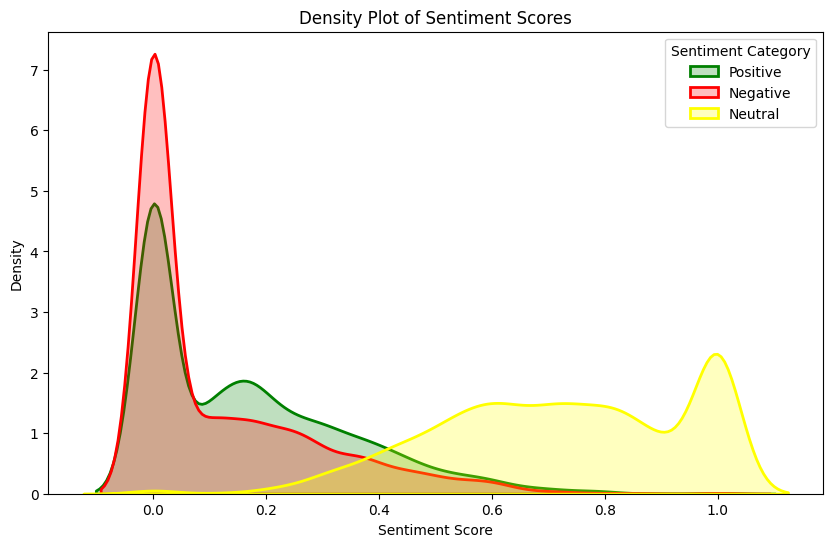

In [60]:
# Define the sentiment categories and corresponding colors
sentiment_categories = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'yellow']

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over sentiment categories and plot KDE
for category, color in zip(sentiment_categories, colors):
    sns.distplot(df[category], hist=False, kde=True,
                 bins=int(180/5), color=color,
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'shade': True, 'linewidth': 2}, label=category)

# Set plot labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()

<ipython-input-61-e5bd70c8c738>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Compound', ylabel='Density'>

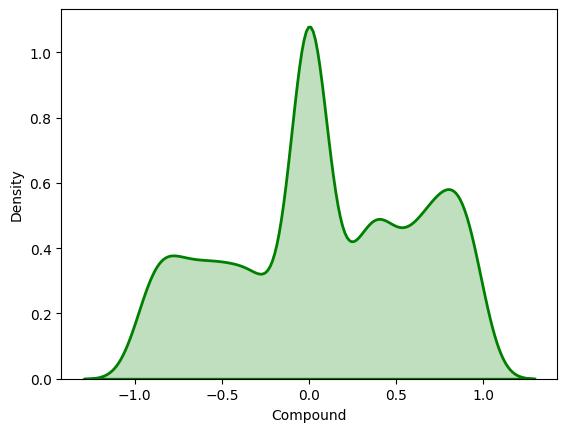

In [61]:
sns.distplot(df["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

##WordCloud of All Sentiments¶


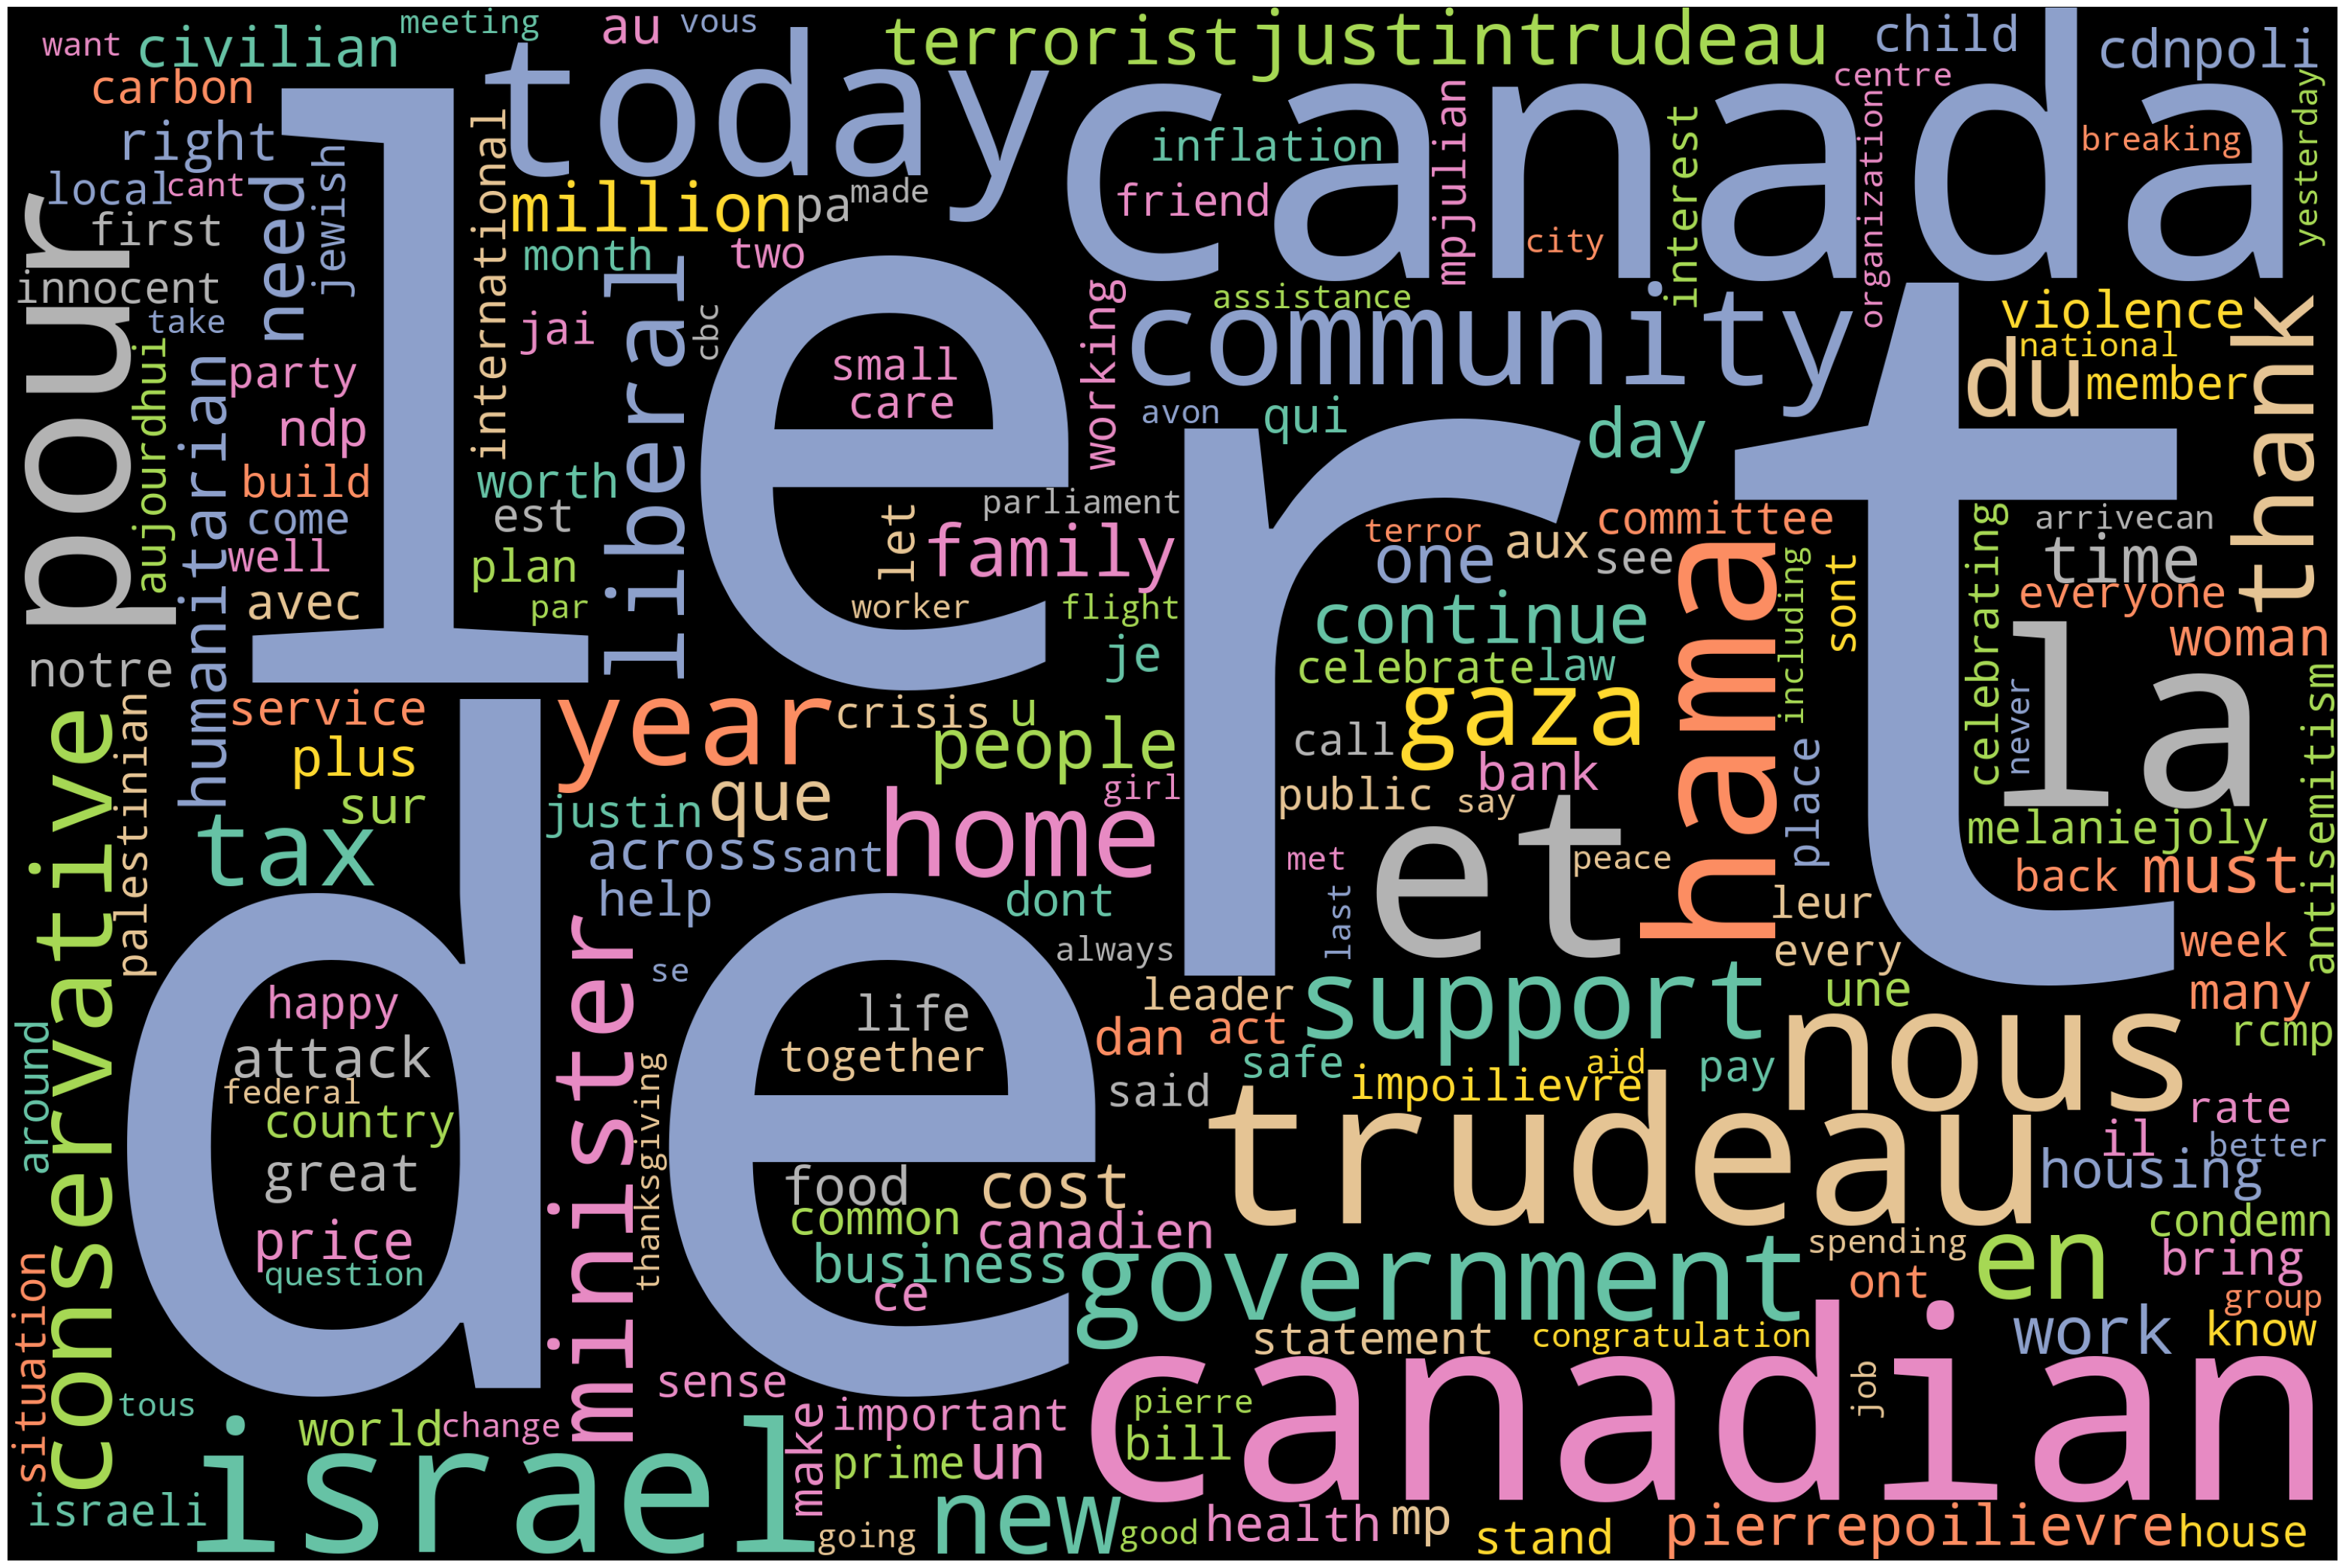

In [62]:
# Concatenate all comments into a single string
text = " ".join(comment for comment in df.clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#WordCloud of Positive Sentiments¶



1.   List item
2.   List item



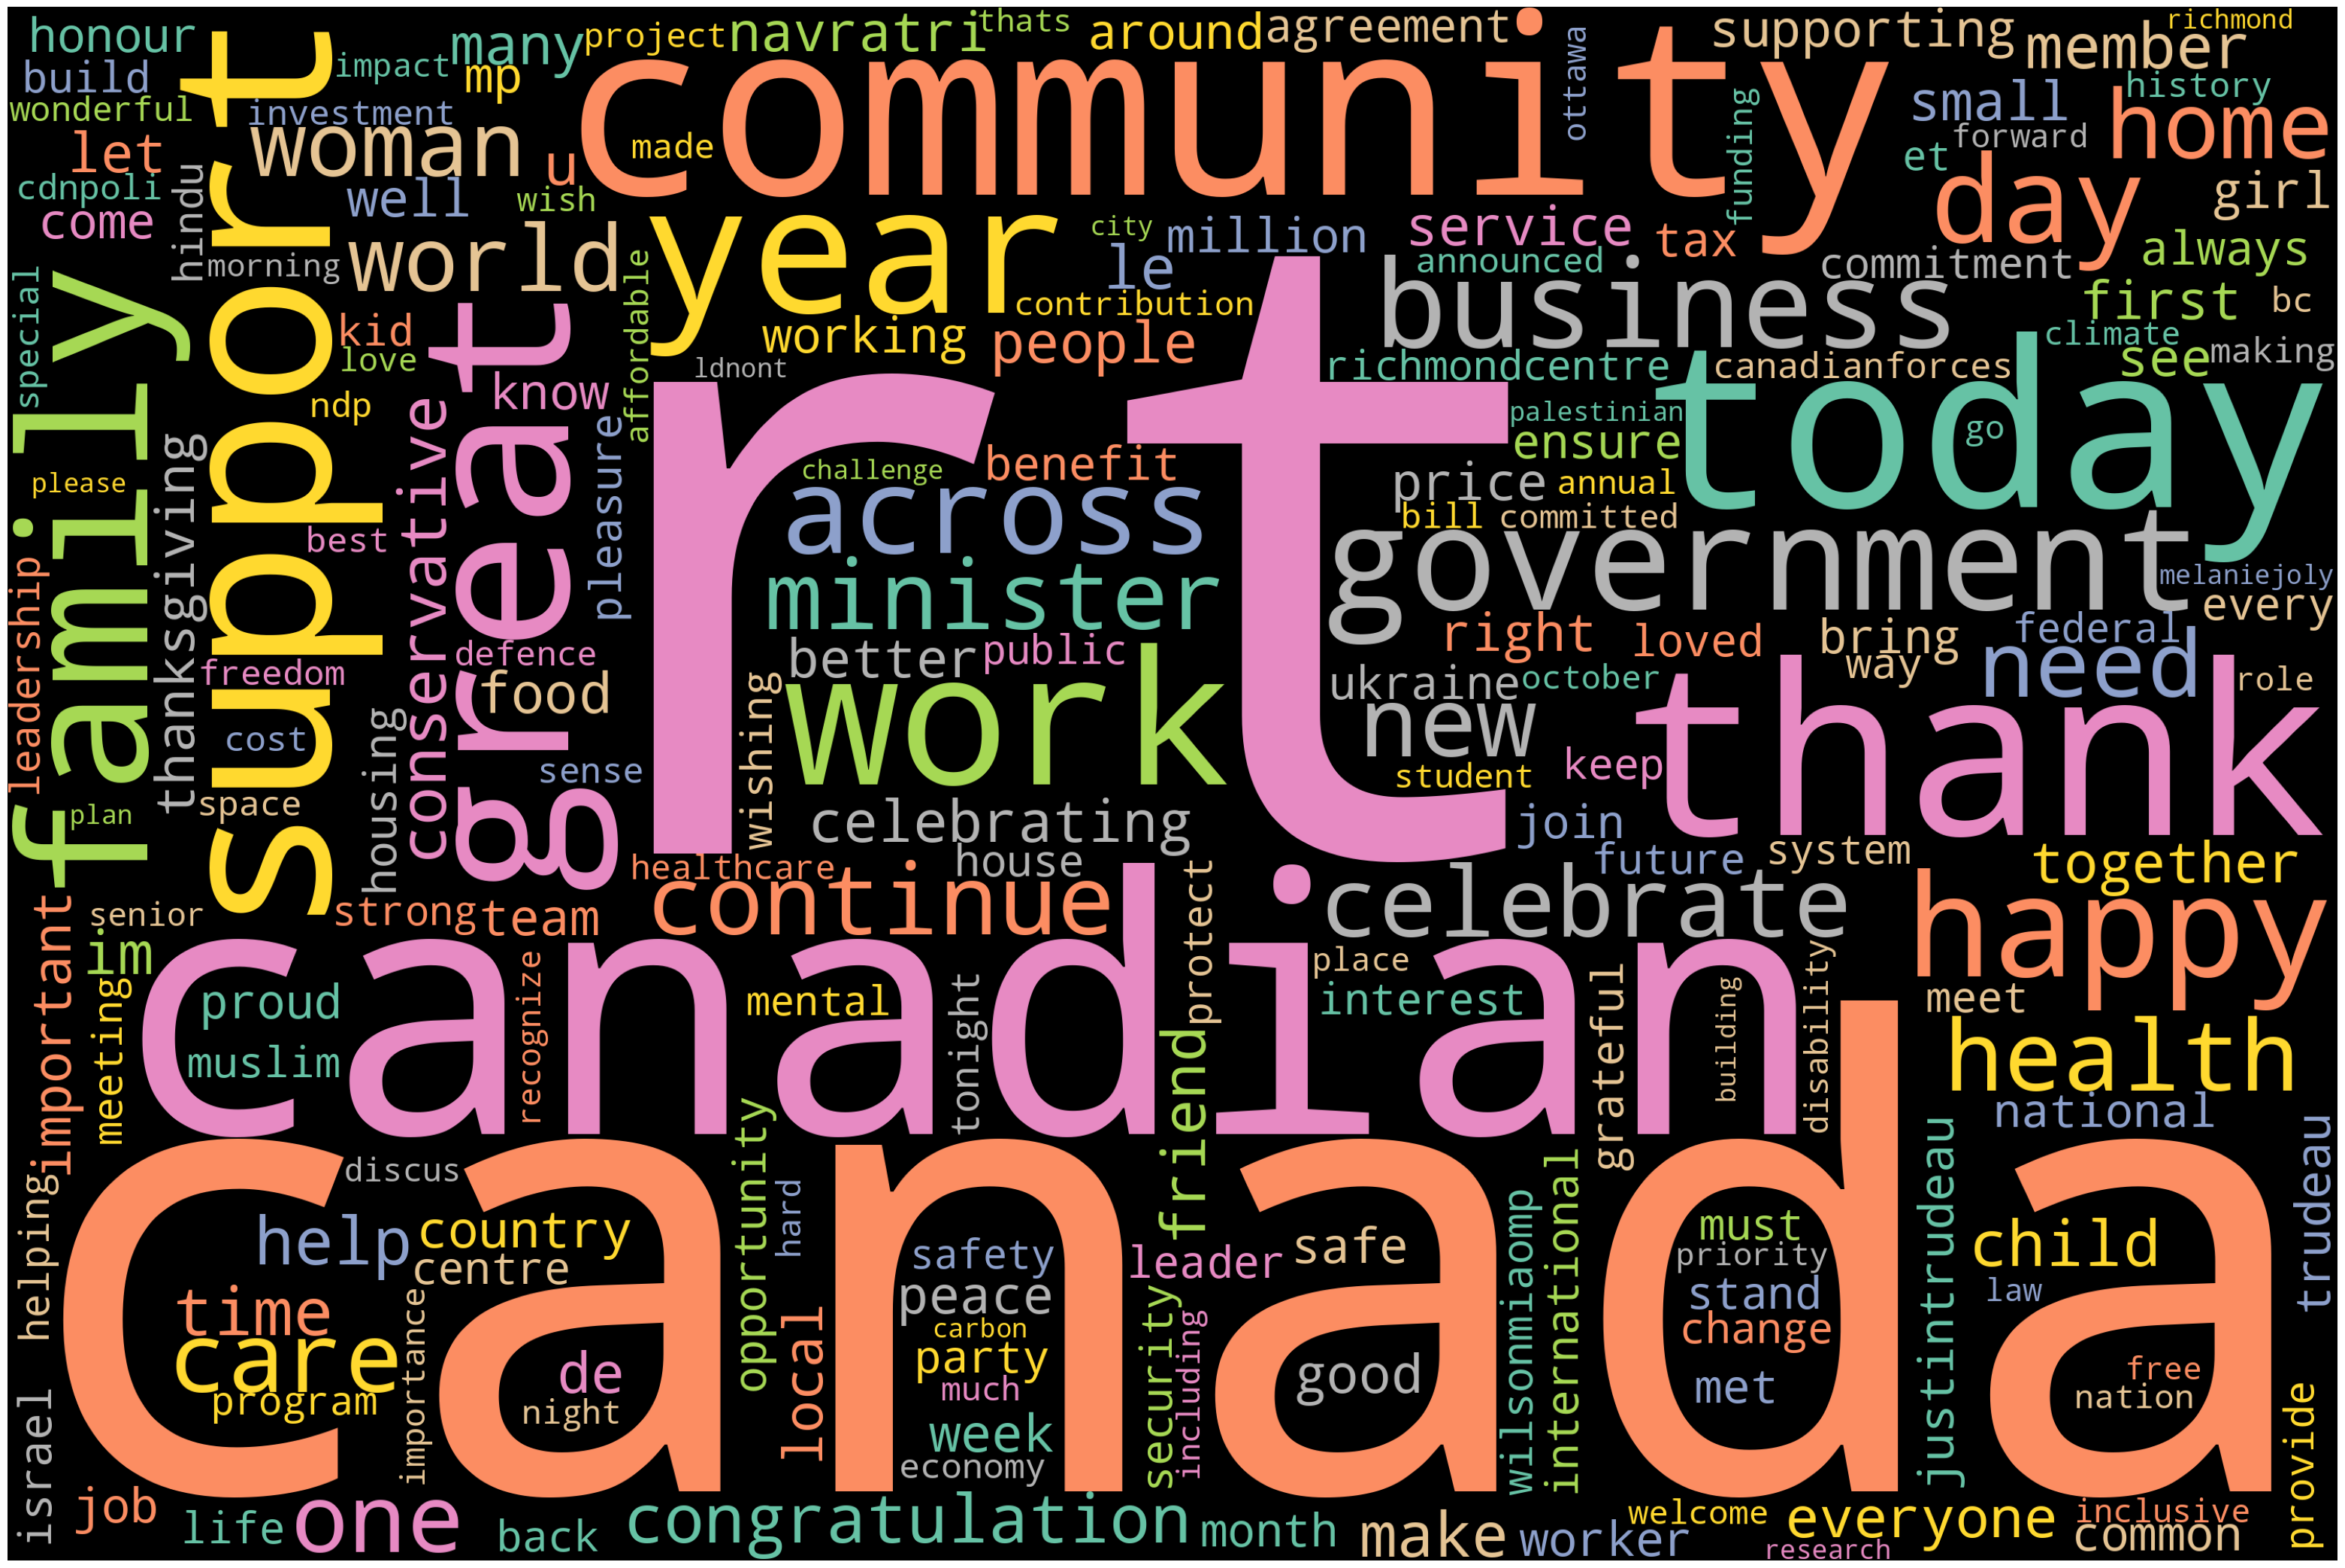

In [63]:
# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Positive'].clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

WordCloud of Neutral Sentiments¶


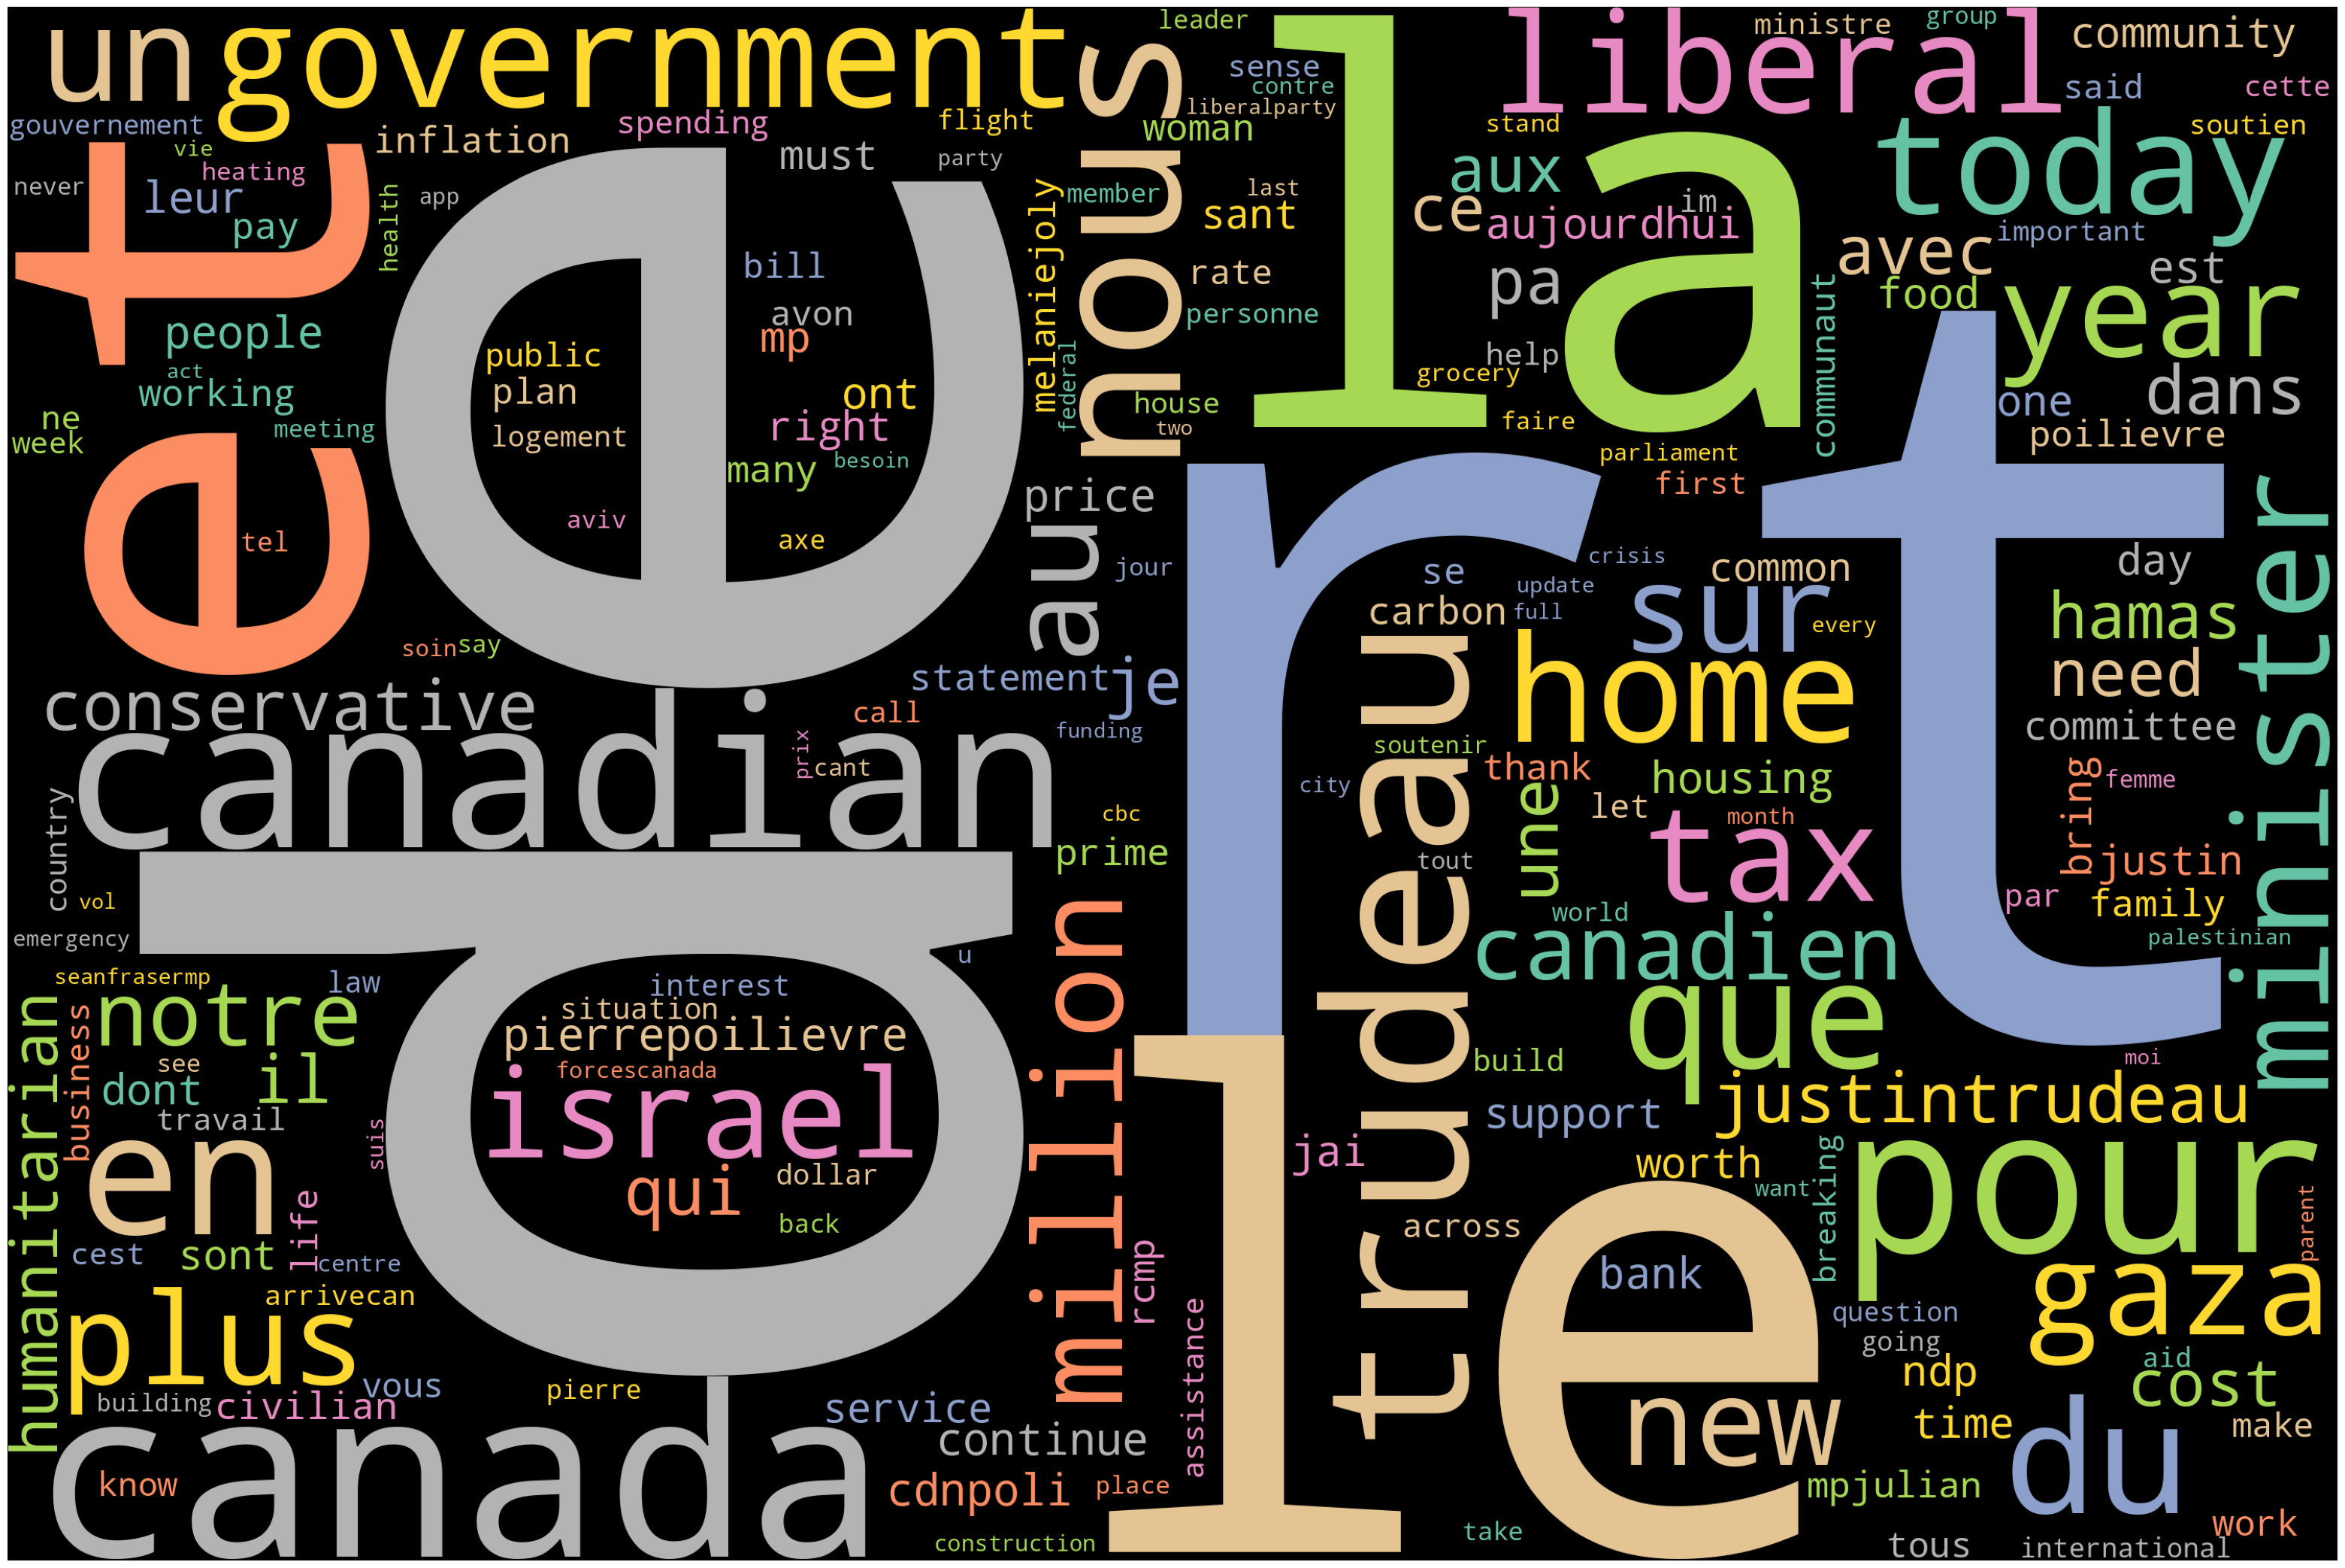

In [64]:

# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Neutral'].clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##WordCloud of Negative Sentiments¶


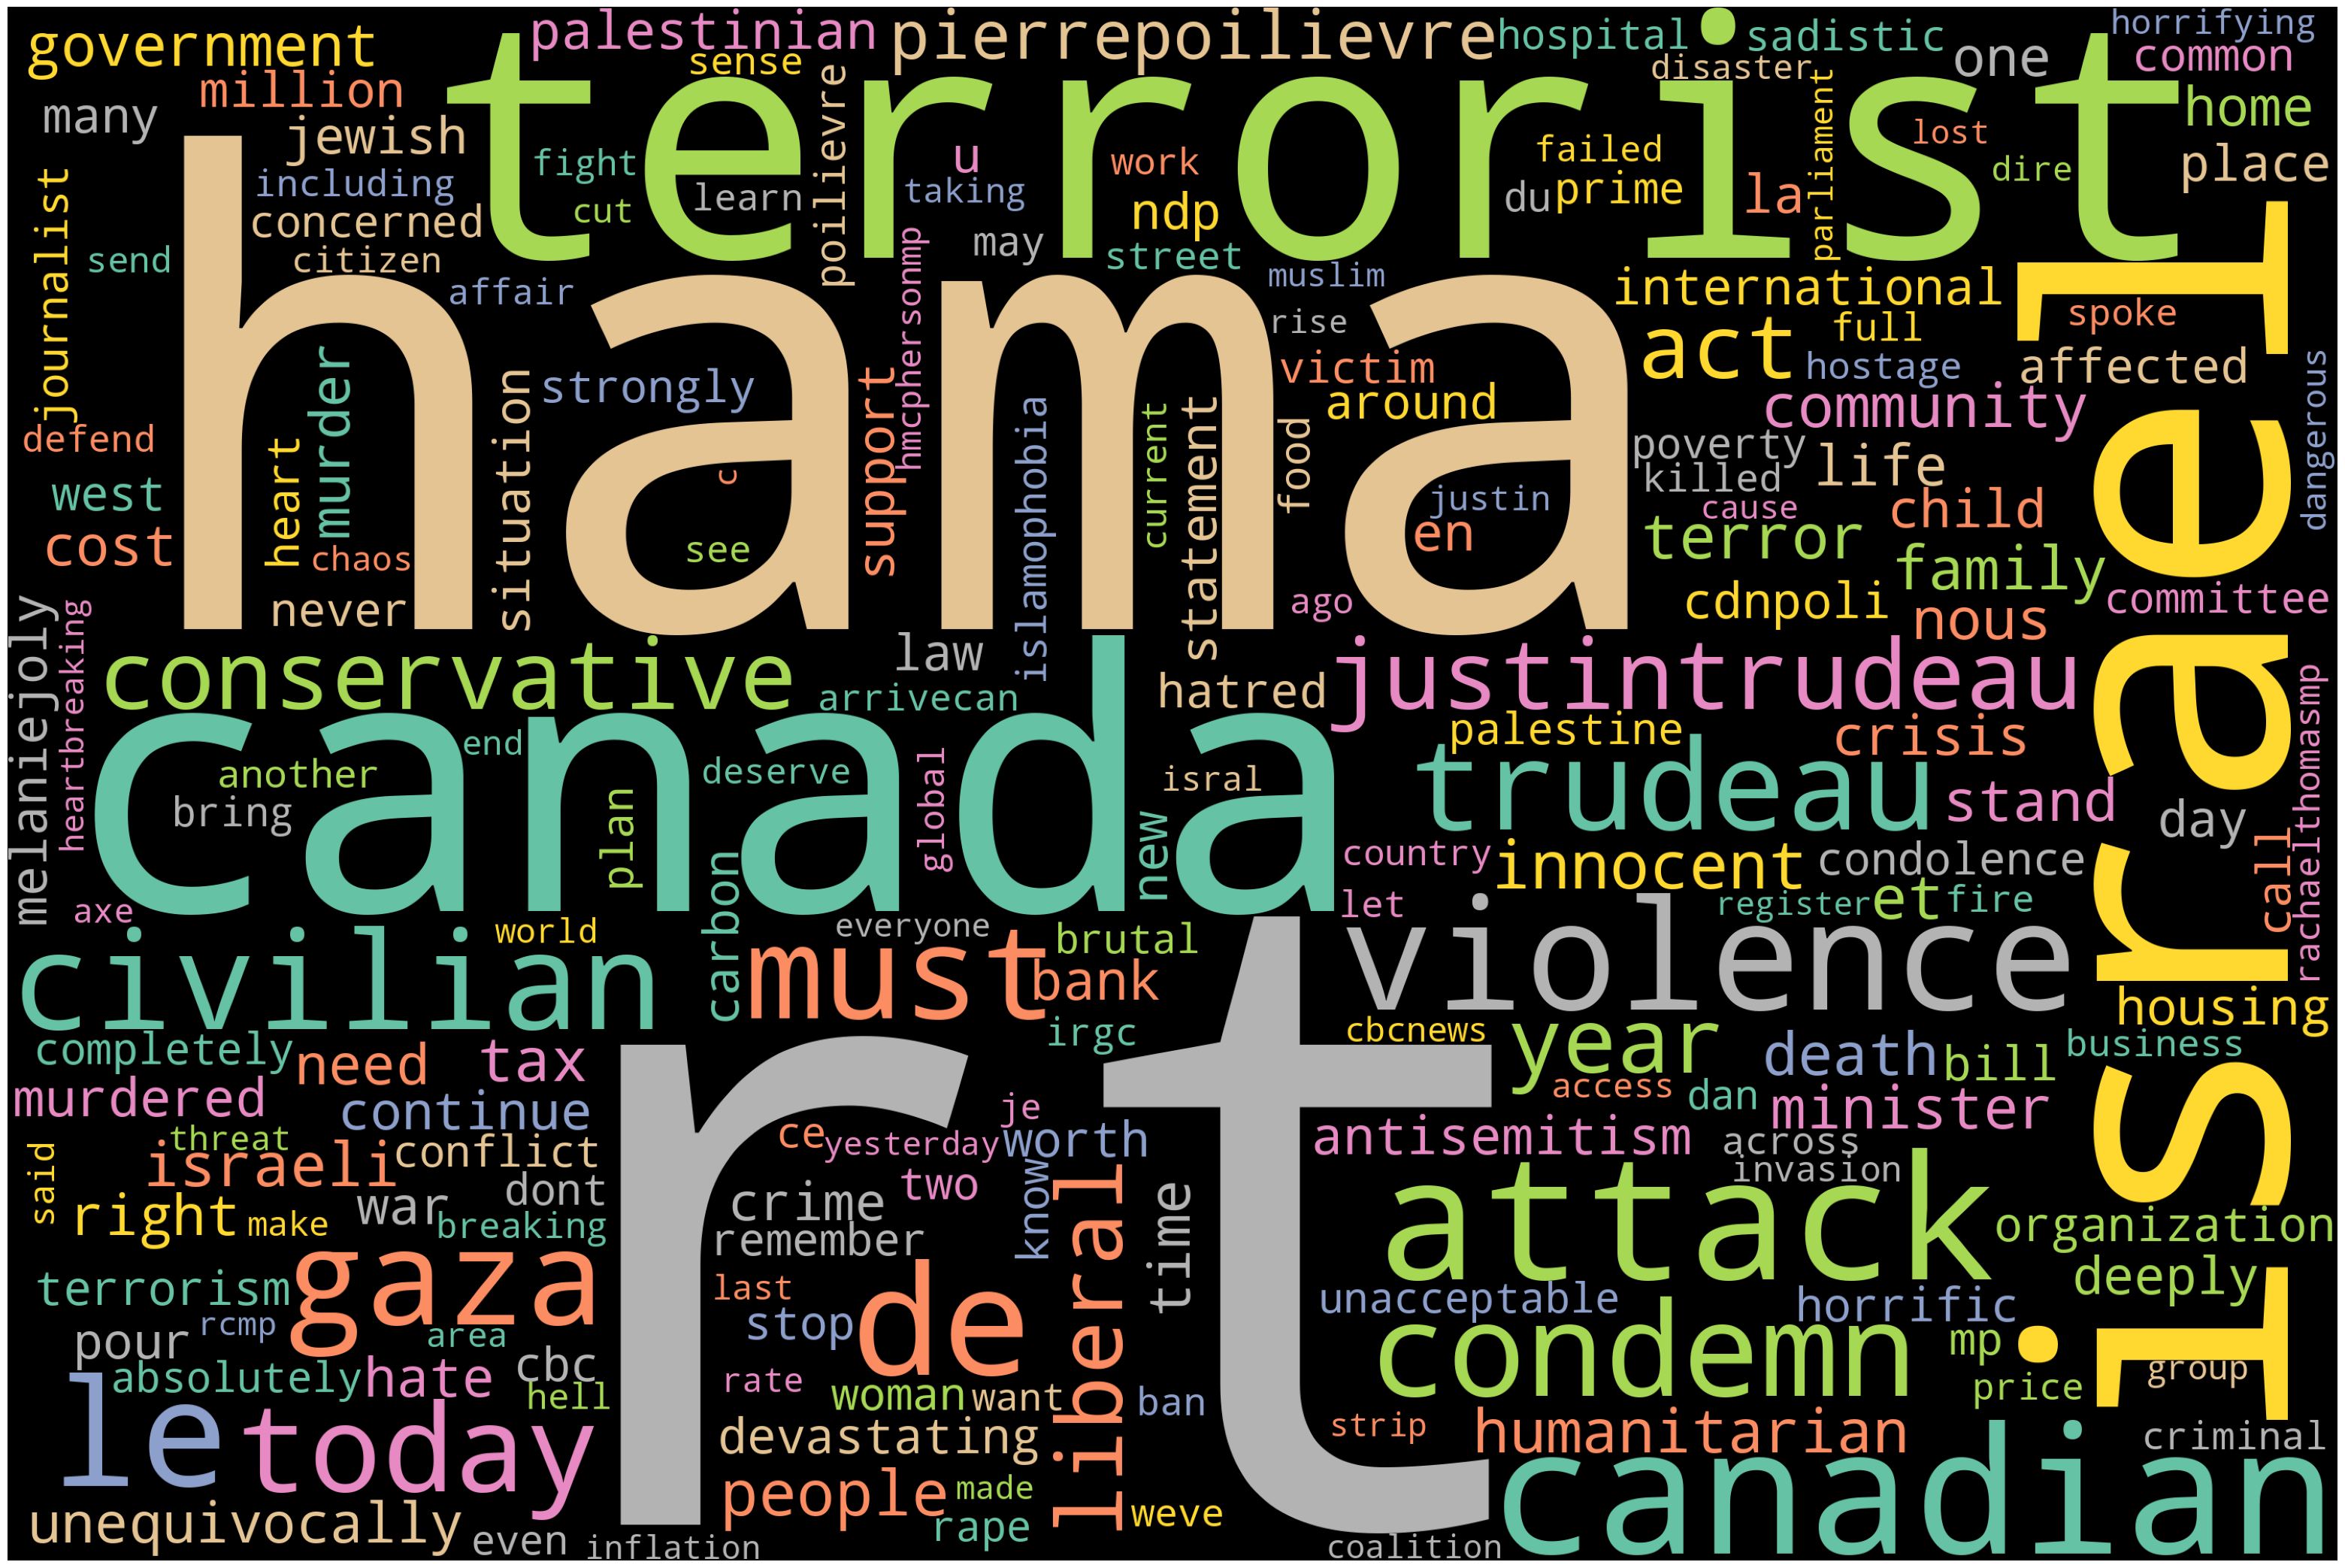

In [65]:
# Concatenate all comments into a single string
text = " ".join(comment for comment in df[df['Category']=='Negative'].clean_text)

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, stopwords=STOPWORDS, background_color="black",
                      colormap='Set2', collocations=False).generate_from_text(text)

# Set figure size
plt.figure(figsize=(40, 30))

# Display the generated word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    4012 non-null   object 
 1   Tweet                   4012 non-null   object 
 2   edit_history_tweet_ids  4012 non-null   object 
 3   author_id               4012 non-null   float64
 4   Name                    4012 non-null   object 
 5   clean_text              4012 non-null   object 
 6   Compound                4012 non-null   float64
 7   Positive                4012 non-null   float64
 8   Negative                4012 non-null   float64
 9   Neutral                 4012 non-null   float64
 10  Category                4012 non-null   object 
dtypes: float64(5), object(6)
memory usage: 344.9+ KB


In [67]:
df.head()


Date  \
0  2023-10-31 22:12:06+00:00   
1  2023-10-31 22:09:45+00:00   
2  2023-10-31 20:33:03+00:00   
3  2023-10-31 20:32:17+00:00   
4  2023-10-31 20:32:17+00:00   

                                               Tweet   edit_history_tweet_ids  \
0  Great to meet with Senator Deacon today to dis...  ['1719477372993323086']   
1  J'ai été ravie de rencontrer le sénateur Deaco...  ['1719476782212989012']   
2  Happy to announce a tentative agreement with t...  ['1719452447259640188']   
3  Les deux parties sont arrivées à la table en s...  ['1719452253981962730']   
4  Heureuse d'annoncer un accord de principe avec...  ['1719452251943555520']   

     author_id         Name  \
0  480418245.0  Anita Anand   
1  480418245.0  Anita Anand   
2  480418245.0  Anita Anand   
3  480418245.0  Anita Anand   
4  480418245.0  Anita Anand   

                                          clean_text  Compound  Positive  \
0  great meet senator deacon today discus regulat...    0.7783     0.236   
1  jai ravie de rencontrer le snateur deacon aujo...    0.0000     0.000   
2  happy announce tentative agreement gc pipscipf...    0.9493     0.577   
3  le deux party sont arrives la table en se conc...    0.4019     0.091   
4  heureuse dannoncer un accord de principe avec ...    0.0000     0.000   

   Negative  Neutral  Category  
0       0.0    0.764  Positive  
1       0.0    1.000   Neutral  
2       0.0    0.423  Positive  
3       0.0    0.909   Neutral  
4       0.0    1.000   Neutral

#Positive or Negative Bias Detection¶


In [68]:
# Calculate the average sentiment scores for each subreddit
subreddit_sentiment = df.groupby('Name')[['Positive', 'Negative']].mean()

# Calculate the difference between positive and negative sentiment scores
subreddit_sentiment['Bias'] = subreddit_sentiment['Positive'] - subreddit_sentiment['Negative']

# Determine the direction of bias: Positive, Negative, or Neutral
def determine_bias_direction(bias):
    if bias > 0.01:  # You can adjust this threshold based on your dataset
        return 'Positive'
    elif bias < -0.01:  # You can adjust this threshold based on your dataset
        return 'Negative'
    else:
        return 'Neutral'

subreddit_sentiment['Bias Direction'] = subreddit_sentiment['Bias'].apply(determine_bias_direction)

# Sort subreddits based on bias in descending order
most_biased_subreddits = subreddit_sentiment.sort_values(by='Bias', ascending=False)

# Print or view the most biased subreddits with bias direction
print(most_biased_subreddits)

                         Positive  Negative      Bias Bias Direction
Name                                                                
Wilson Miao              0.276305  0.023305  0.253000       Positive
Peter Fragiskatos        0.260483  0.088690  0.171793       Positive
Marci Ien                0.202682  0.048670  0.154011       Positive
Anita Anand              0.180562  0.033962  0.146600       Positive
Leah Taylor Roy          0.209305  0.074390  0.134915       Positive
Dr. Helena Jaczek        0.219862  0.085828  0.134034       Positive
Adam van Koeverden       0.271189  0.138405  0.132784       Positive
MP Ryan Turnbull 🇨🇦🇺🇦    0.192477  0.067286  0.125191       Positive
Salma Zahid              0.243143  0.118063  0.125079       Positive
Iqra Khalid 🇨🇦           0.238860  0.121088  0.117772       Positive
Mark Holland             0.139992  0.031744  0.108248       Positive
Tim S. Uppal             0.227550  0.130775  0.096775       Positive
Randy Boissonnault 🏳️‍🌈  0.149385 

#Topic Modelling¶


In [69]:

# Step 3: Topic Modeling
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1)  # Assuming 5 topics
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

In [70]:
# Get the vocabulary indices for 'israel' and 'palestine' in your vectorizer
israel_word_index = vectorizer.vocabulary_['israel']
palestine_word_index = vectorizer.vocabulary_['palestine']

In [71]:
topic_term_distribution = lda_model.components_

In [72]:
israel_topic_index = topic_term_distribution[:, israel_word_index].argmax()
palestine_topic_index = topic_term_distribution[:, palestine_word_index].argmax()

#Geopolitical Stance Determination Using Dominant Topics and Sentiment Scores

In [73]:
# Define the function to determine geopolitical stance
def determine_geopolitical_stance(row):
    sentiment_score = row['Compound']
    topic_distribution = lda_model.transform(vectorizer.transform([row['clean_text']]))[0]

    # Determine stance based on sentiment score and dominant topic
    if sentiment_score <= -0.5:
        return 'Against Israel/Palestine'
    elif sentiment_score >= 0.5 and topic_distribution.argmax() == israel_topic_index:
        return 'Supports Israel'
    elif sentiment_score >= 0.5 and topic_distribution.argmax() == palestine_topic_index:
        return 'Supports Palestine'
    else:
        return 'Neutral/Stance Not Clear'

# Apply the function to the DataFrame to determine geopolitical stances
df['geopolitical_stance'] = df.apply(determine_geopolitical_stance, axis=1)

In [74]:
stance_counts = df['geopolitical_stance'].value_counts()
print("Geopolitical Stance Distribution:")
print(stance_counts)

Geopolitical Stance Distribution:
Neutral/Stance Not Clear    2917
Against Israel/Palestine     738
Supports Israel              357
Name: geopolitical_stance, dtype: int64


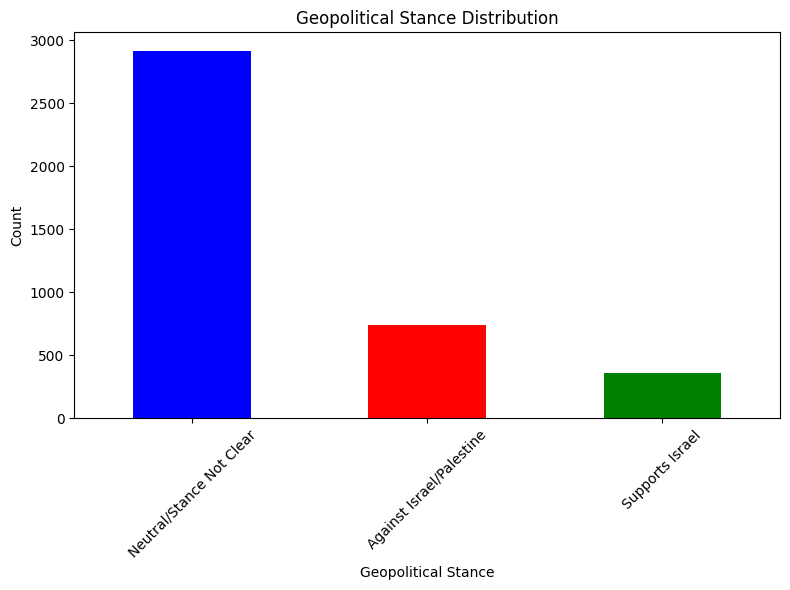

In [75]:
# Assuming 'geopolitical_stance' is a column in your DataFrame df
stance_counts = df['geopolitical_stance'].value_counts()

# Create bar chart using DataFrame values
plt.figure(figsize=(8, 6))
stance_counts.plot(kind='bar', color=['blue', 'red', 'green', 'yellow'])
plt.xlabel('Geopolitical Stance')
plt.ylabel('Count')
plt.title('Geopolitical Stance Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the chart
plt.show()

## Geopolitical Stance Distribution:

- **Neutral/Stance Not Clear:** The majority of the data falls into this category with a count of 286,000. This suggests that a significant portion of the dataset does not express a clear geopolitical stance on the Israel-Palestine issue.
  
- **Against Israel/Palestine:** There are 123,092 instances where the stance is against Israel/Palestine. This indicates a substantial portion of the data expressing a negative sentiment or opposition towards Israel, Palestine, or both.
  
- **Supports Palestine:** There are 13,911 instances where the stance supports Palestine. This represents a smaller but notable segment of the data that expresses support for the Palestinian side of the conflict.

- **Supports Israel:** There are 13,722 instances where the stance supports Israel. Similar to supporting Palestine, supporting Israel is also expressed by a smaller but significant portion of the dataset.

In summary, the majority of the data does not express a clear stance. Among those that do, there is a considerable diversity of opinions, with a slightly higher number of instances leaning against Israel/Palestine.


In [76]:
israel_supporters = df[df['geopolitical_stance'] == 'Supports Israel']

# Get the unique names of users who support Israel
israel_supporter_names = israel_supporters['Name'].unique()

# Print the names
for name in israel_supporter_names:
    print(name)

Anita Anand
Bill Blair
Chris Bittle
Blake Desjarlais
Ezra Levant 🍁🚛
Francesco Sorbara
Peter Julian
Greg McLean
Harjit Sajjan
Dr. Helena Jaczek
Heather McPherson
Iqra Khalid 🇨🇦
Jasraj Singh Hallan 🇨🇦
Jenna Sudds
Jennifer O'Connell
Kamal Khera
Karina Gould
Arielle Kayabaga
kyleseeback
Leah Taylor Roy
Lindsay Mathyssen
Marc Dalton, M.P.
Marci Ien
Mark Holland
Michael Cooper, MP
Michelle Rempel Garner
Mike Lake
Pam Damoff
Parm Bains 🇨🇦
Peter Fragiskatos
Pierre Poilievre
Randy Boissonnault 🏳️‍🌈
Salma Zahid
Shuv Majumdar
Stephanie Kusie
Jagmeet Singh
Tim S. Uppal
Tom Kmiec
MP Ryan Turnbull 🇨🇦🇺🇦
Adam van Koeverden
Wilson Miao
Garnett Genuis


In [77]:
df.to_csv('/content/drive/MyDrive/A4P/octoberout.csv', index=False)